<h1 style="font-family: Georgia, serif;font-size: 2.5em;margin-left: 3em;margin-right: 4em;"> 

---

Probabilités 2024/25 : Projet numérique

---

</h1> 

In [2]:
## Import des packages et des fonctions utiles pour le projet

#-----------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from math import factorial

#-----------------------------------------------------

## Vecteur de couleurs
Cat=np.array(['#F8B005','#E35704','#A92A04'])

## Fonction pour représenter les simulations
def plotSim(S,figsize=(7,7),fromAbove=True,cropSim=True):

    ## Sort by increasing time
    Sim=S.copy()
    indSort=np.argsort(Sim[:,0])
    if fromAbove==False:
        indSort=np.flip(indSort)
    Sim=Sim[indSort,:]
    
    coordinates,sizes,colors = Sim[:,1:3], Sim[:,3], Cat[Sim[:,4].astype(int)]
    
    # Calculate bottom-left corner of each rectangle to center it
    bottom_left_coords = coordinates - np.stack([sizes, sizes], axis=1)*(2**0.5)/2

    # Create the rectangles
    rectangles = [patches.Rectangle((x, y), w, h,angle=45,rotation_point='center') for (x, y), w, h in zip(bottom_left_coords, sizes*(2**0.5), sizes*(2**0.5))]

    # Create a PatchCollection and apply the colors
    collection = PatchCollection(rectangles, facecolor=colors, edgecolor='black')
    
    ## Plot
    fig,ax = plt.subplots(figsize=figsize)
    ax.add_collection(collection)
    if cropSim:
        ax.set_xlim(D[0],D[1])
        ax.set_ylim(D[0],D[1])
    else:
        ax.set_xlim(Dext[0],Dext[1])
        ax.set_ylim(Dext[0],Dext[1])
    plt.show()

## Introduction

<h1 style="font-family: Georgia, serif;font-size: 1.1em;margin-left: 3em;margin-right: 4em;"> 

---

La géométrie stochastique est une branche des probabilités qui s'intéresse à la modélisation d'objets géométriques (e.g. points, lignes, polygones,...) dont les attributs et/ou la position dans l'espace sont aléatoires. Ces modèles sont utilisés pour modéliser un grand nombre de phénomènes, comme par exemple la position des épicentres  de séismes, la positions des arbres dans une forêt, ou la disposition de fibres ou de grains dans des matériaux composites.

L'objectif de ce projet est de construire et de simuler un modèle simple de géométrie stochastique, le modèle dit des *feuilles mortes*. Il tire son nom du fait qu'il peut être vu comme une façon de modéliser des tapis de feuilles mortes sur le sol. L'idée est la suivante: on assimile les feuilles à des carrés "apparaissant" à des temps aléatoires et à des positions aléatoires sur un domaine $\mathcal{D}\subseteq \mathbb{R}^2$ (le sol). On considère également que la taille et la couleur de ces carrés sont aléatoires. En supposant que les feuilles tombent depuis un temps $t=-\infty$ et on considère l'état du domaine $\mathcal{D}$ à l'instant $t=0$ (le tapis de feuilles).

---

</h1> 

## I - Temps d'arrivée des feuilles

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

On suppose qu'on observe le tapis de feuille mortes au temps $T_0=0$ et que des feuilles sont tombées depuis un temps infini. On note ainsi $(T_{k})_{k\in\mathbb{Z}_-^*}$ la séquence des temps d'arrivée sur le sol des feuilles: $T_{-1}\le 0$ est le temps d'arrivée de la dernière feuille du tapis, $T_{-2}\le T_{-1}$ le temps d'arrivée de l'avant-dernière feuille, etc.

Afin de modéliser les temps aléatoires $(T_{-i})_{i\in\mathbb{N}^*}$ auxquels les feuilles mortes tombent sur le sol, nous recourrons à un modèle permettant de représenter des points aléatoires dans l'intervalle $I = ]-\infty, 0]$: le processus de Poisson (homogène). Ce modèle est défini de la manière suivante :

1. Pour tout $ A \in {\cal B} (]-\infty, 0])$ borné et fixé, le nombre de points $N (A)=\text{Card}\lbrace i\in\mathbb{N}^* : T_{-i} \in A\rbrace$ suit
      une loi de Poisson de paramètre $\theta \, | A |$, où $\theta \in \mathbb{R}^+$ et $|A|$ est la mesure de Lebesgue de $A$. On a donc
      $$ \mathbb{P} ( N (A) = n) = \exp \bigl( - \theta | A | \bigr) \frac{
        \bigl( \theta | A | \bigr)^n }{n!},~n \in \N $$

2. Pour tout $p\ge 2$, si $A_1,...,A_p \in {\cal B} (]-\infty, 0]) $ sont 
      disjoints deux à deux, alors $ N(A_1),...,N(A_p)$ sont 
      mutuellement indépendants.

Le paramètre $\theta$ est appelé l'intensité (ou densité) du processus de Poisson.

---

</h1> 


**Question 1.a.** Pour $i\in\mathbb{N}^*$ on pose $E_i = T_{-i +1} - T_{-i}$. Justifier que $\forall i\in\mathbb{N}^*, \tau >0,$  les événements $\lbrace E_i > \tau\rbrace$ et $\lbrace N([T_{-(i-1)}-\tau, T_{-(i-1)}[)=0\rbrace$ sont identiques, tout comme les évènements $\lbrace T_{-(i-1)}=t\rbrace$ et $ \lbrace  N([t,0[)=i-1\rbrace \cap\lbrace  N(]t,0[)=i-2 \rbrace$ pour $t<0$ et $i>1$.


Soient $i\in \mathbb{N}^{*}, \tau>0$.
On a :
$$
E_i>\tau \leftrightarrow T_{-i} < T_{-(i-1)} - \tau
$$
Or, $(T_{-j})_{j \in \mathbb{N}^*}$ est décroissante. 
Donc pour tout entier naturel non nul j, 
$$
T_{-j} \notin ]T_{-i}, T_{-(i-1)}[
$$
D'où :
$$
E_i>\tau \leftrightarrow \forall j \in \mathbb{N}^{*}, T_{-j} \notin [T_{-(i-1)}-\tau, T_{-(i-1)}[
$$
Ce qui donne $\lbrace E_i > \tau\rbrace$ = $\lbrace N([T_{-(i-1)}-\tau, T_{-(i-1)}[)=0\rbrace$

In [1]:
import numpy as np

**Question 1.b.** En déduire que $\forall i\in\mathbb{N}^*$, $E_i$ suit une loi exponentielle de paramètre $\theta$.

*Indication: Pour $i>1$, on pourra passer par le calcul de $\mathbb{P}(N([T_{-(i-1)}-\tau, T_{-(i-1)}[)=0)$ et utiliser le théorème de l'espérance totale pour calculer cette probabilité (la définition de la loi de $N(A)$ n'étant valable a priori que pour des boréliens $A$ déterministes/fixés).* 

**Question 1.c.** Soit $n\in\mathbb{N}$ où $n\ge 2$, et soient $e_1, \dots, e_{n-1} \in \R_+$. Montrer que $\mathbb{P}(E_n>\tau\vert E_1=e_1, \dots, E_{n-1}=e_{n-1} ) = \mathbb{P}(E_n>\tau)$. 

*Indication: On pourra poser  $\mathcal{H}_{n-1} = \lbrace E_1=e_1, \dots, E_{n-1}=e_{n-1}\rbrace$ et exprimer $\mathcal{H}_{n-1}$ en fonction des variables $T_{-i}$.* 

Posons effectivement $\mathcal{H}_{n-1} = \lbrace E_1=e_1, \dots, E_{n-1}=e_{n-1}\rbrace$

On a, par réccurence immédiate et parce que $T_0=0$ :
$$
\mathcal{H}_{n-1} = \lbrace T_{-1} = -e_1, T_{-2} = -e_1 -e_2, \dots , T_{-(n-1)} = -\sum_{i=1}^{n-1} e_i\rbrace
$$
Pour tout $k\in [1,n-1]$, posons :
$$
A_{2k} = \lbrace -\sum_{i=1}^{k} e_i \rbrace
$$
$$
A_{2k-1} = ]-\sum_{i=1}^{k} e_i, \sum_{i=1}^{k-1} e_i [,
$$
$$
B = ]-\sum_{i=1}^{n-1} e_i - \tau, -\sum_{i=1}^{n-1} e_i[
$$
$\mathbb{P}(E_n>\tau\vert \mathcal{H}_{n-1})$ se réexprime alors (en réutilisant 1a):
$$
\mathbb{P}(N(B)=0\vert \mathcal{H}_{n-1})
$$
avec $\mathcal{H}_{n-1} = \lbrace \forall k \in [1,n-1], N(A_{2k})=1, N(A_{2k-1}=0) \rbrace$

Or, les $A_l$ sont disjoints deux à deux et avec $B$. Par indépendance des $N(A_l), N(B)$, on a donc :
$$
\mathbb{P}(N(B)=0\vert \mathcal{H}_{n-1}) = \mathbb{P}(N(B)=0) = \exp(-\theta\tau)
$$
ie :
$$
\mathbb{P}(E_n>\tau\vert E_1=e_1, \dots, E_{n-1}=e_{n-1} ) = \mathbb{P}(E_n>\tau)
$$
d'après 1b.

**Question 1.d.** En déduire que la suite $(E_i)_{i\in\mathbb{N}^*} $ est une suite de variables aléatoires indépendantes, toutes de loi exponentielle de paramètre $\theta$.

**Question 1.dbis.(Bonus)** Montrer que inversement, si $(E_i)_{i\in\mathbb{N}^*} $ est une suite de variables aléatoires indépendantes, toutes de loi exponentielle de paramètre $\theta$, alors la suite $(T_{-i})_{i\in\mathbb{N}^*}$ telle que $E_i = T_{-i +1} - T_{-i}$ définit un processus de Poisson sur $]-\infty, 0[$.

**Question 1.e.**  Implémenter une fonction qui, étant données une valeur $t_{\min}<0$ et une valeur de $\theta$, permet de simuler les temps d'arrivée des feuilles tombant dans l'intervalle $[t_{\min},0[$, i.e. les variables $(T_{-i})_{i\in\mathbb{N}^*}$ telles que $T_{-i} \in [t_{\min},0[$. On veillera à ce que les temps d'arrivées soient retournés un vecteur trié dans l'ordre croissant.

In [4]:
def simTempsArrivee(t_min,theta):
    ## COMPLETER ###

SyntaxError: incomplete input (3210240132.py, line 2)

In [5]:
#J'ai créé une autre cellule pour limiter les conflits de fusion
def simTempsArrivee(t_min,theta):
    #On part de U([0,1[)
    p = np.random.uniform(0,1)
    #Pour simuler N([Tmin,0[))
    F=0
    n=0
    while F<p :
        #t_min est négatif
        F+=np.exp(theta*t_min)*((-theta*t_min)**n)/factorial(n)
        n+=1
    N = n-1

    #On répartit désormais les N valeurs aléatoirement (uniformément) sur l'intervalle
    T = np.random.uniform(t_min,0,N)
    T.sort()
    return T

simTempsArrivee(-10,1)

array([-7.93009834, -4.46070187, -4.45710583, -3.45336072, -2.44252214,
       -0.79509268, -0.03253825])

## II - Caractéristiques des feuilles

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 


---

Dans la suite du projet, on pose $\mathcal{D}=[-1,1]\times [-1,1]$ et $\mathcal{D}_{ext}=[-2,2]\times[-2,2]$.


On passe maintenant à la modélisation des caractéristiques des feuilles $F$, à savoir leur position, leur couleur et leur taille.

Comme indiqué en introduction, les feuilles sont assimilées à des carrés de $\mathbb{R}^2$. En particulier, on suppose que toutes les feuilles tombent avec la même orientation: on peut donc assimiler ces feuilles/carrés à des ''boules'' (fermées) pour la norme $\Vert\cdot\Vert_1$ définie par $\Vert x\Vert_1 = \vert x_1\vert + \vert x _2\vert$, $x=(x_1,x_2)\in\mathbb{R}^2$. Ainsi chaque feuille $F$ est en somme une boule de centre $\chi(F)\in\mathbb{R}^2$ et de rayon $\rho(F)>0$ aléatoires.

La position d'une feuille $F$ sur le sol est spécifiée par le centre $\chi(F)\in\mathbb{R}^2$ du carré/de la boule correspondant(e). On suppose que les feuilles tombent uniformément dans $\mathcal{D}_{ext}$, i.e. $\chi(F)\sim \mathcal{U}(\mathcal{D}_{ext})$.

La taille d'une feuille $F$ est spécifiée par le rayon $\rho(F)>0$ de la boule correspondante. Ce rayon suit une loi qui sera précisée plus tard, mais on suppose que la taille des feuilles est bornée par $1/2$, de sorte que seules les feuilles tombant dans $\mathcal{D}_{ext}$ intersectent la zone d'étude $\mathcal{D}$. 

On représente ci-dessous une feuille $F$ pour fixer les idées.

</h1> 

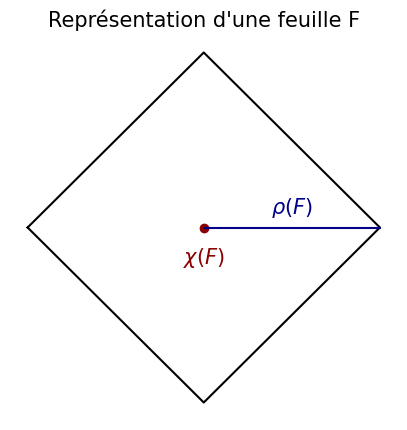

In [6]:
## Figure représentant une feuille F
fig,ax=plt.subplots(figsize=(5,5))
ax.plot([-1,0,1,0,-1],[0,1,0,-1,0],color="black")
ax.plot([0,1],[0,0],color="darkblue")
ax.scatter(0,0,color="darkred")
ax.text(-0.,-0.1,r"$\chi(F)$",fontsize=15,ha='center', va='top',color="darkred")
ax.text(0.5,0.05,r"$\rho(F)$",fontsize=15,ha='center', va='bottom',color="darkblue")
ax.set_title("Représentation d'une feuille F",fontsize=15)
ax.axis('off')
plt.show()


<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

La couleur d'une feuille $F$ est quant à elle modélisée par un entier $c(F)\in\lbrace 0,...,N_c-1\rbrace$ où $N_c$ désigne le nombre de couleurs possibles. La probabilité qu'une feuille soit de couleur $k$ est notée $\mathbb{P}(c(F)=k)=p_k\in[0,1]$ et on a $\sum_{k=0}^{N_c-1}p_k=1$.

Enfin, on considère que les caractéristiques (position, taille, couleur) d'une feuille sont indépendantes de son temps d'arrivée.
Ainsi, si on note $F$ une feuille arrivant à un des temps $T_{-i}$, $i\in\mathbb{N}^*$, alors $\chi(F)$,  $c(F)$ et $\rho(F)\in ]0,1/2[$  sont des variables aléatoires indépendantes de $T_{-i}$. 
On supposera également que  $\chi(F)$ est indépendante de $c(F)$ et $\rho(F)$, et que la loi de $\rho(F)$ dépend de la couleur $c(F)$ de la feuille.

---

</h1> 


**Question 2.a.** Soit $x_0 \in\mathcal{D}$ quelconque. Montrer que la probabilité qu'une feuille $F$ de couleur $c(F)=i\in\lbrace 0,\dots,N_c-1\rbrace$ et de taille $\rho(F)=r\in]0,1/2[$ recouvre le point $x_0$ est donnée par
$$
\begin{aligned}
P(x_0\in F \;\vert\; c(F)=i,\; \rho(F)=r)
%=\frac{\vert B_1(x_0, r)\vert }{\vert \mathcal{D}\vert}
=\frac{r^2 }{8}
\end{aligned}
$$


**Question 2.b.** Montrer que la probabilité qu'une feuille $F$ de couleur $i$  recouvre le point $x_0 \in\mathcal{D}$ est donnée par
$$
\begin{aligned}
\mathbb{P}(c(F)=i, x_0\in F)
&=\frac{p_ir_i^2}{8}
\end{aligned}
$$
où on note $p_i = \mathbb{P}(c(F)=i) $ et $r_i^2=\mathbb{E}\big[\rho(F)^2 \,\big\vert c(F)=i\big]$.


**Question 2.c.** En déduire que  la probabilité qu'une feuille $F$ recouvre le point $x_0 \in\mathcal{D}$ est donnée par
$$
\begin{aligned}
\mathbb{P}(x_0\in F)
&=\frac{1}{8}\sum_{j=0}^{N_c-1} p_jr_j^2
\end{aligned}
$$
et que la probabilité qu'une feuille $F$ soit de couleur $i$  sachant qu'elle recouvre le point $x_0 \in\mathcal{D}$ est donnée par
$$
\begin{aligned}
\mathbb{P}(c(F)=i \vert x_0\in F)
&=\frac{p_ir_i^2}{\sum_{j=0}^{N_c-1} p_jr_j^2}
\end{aligned}
$$


<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

**Remarque:** Soit $C(x_0)\in\lbrace 0,\dots,N_c-1\rbrace$ la couleur de la feuille recouvrant le point $x_0\in\mathcal{D}$  au temps $T_0=0$. $C(x_0)$ correspond donc à la couleur de la dernière feuille recouvrant $x_0$.  On note que puisque les couleurs des feuilles sont tirées indépendamment de leurs temps d'arrivée, la distribution de la couleur de la dernière feuille recouvrant le point $x_0$ est la même que la distribution de la couleur de n'importe quelle autre feuille recouvrant $x_0$, à savoir $\mathbb{P}(c(F)= \cdot ~ \vert x_0\in F)$. On peut dès lors conclure que

$$
\begin{aligned}
\mathbb{P}(C(x_0)=i)=\mathbb{P}(c(F)=i \vert x_0\in F) = \frac{p_ir_i^2}{\sum_{j=0}^{N_c} p_jr_j^2}, \quad i\in \lbrace 0,\dots,N_c-1\rbrace.
\end{aligned}
$$

---

</h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

**Question 2.cbis.(Bonus).**  Soit $\tilde N(x_0,\tau)$ le nombre de feuilles recouvrant le point $x_0$ et étant tombées dans l'intervalle de temps $[-\tau,0[$. Montrer que $ \tilde N(x_0,\tau)$ suit une loi de Poisson de paramètre $\tilde\theta\tau$ avec 

$$\tilde\theta=\frac{\theta}{8}\sum_{j=0}^{N_c-1} p_jr_j^2$$

*Indication: On pourra introduire la variable $\tilde N(\tau)$ donnant le nombre total de feuilles tombées  dans l'intervalle de temps $[-\tau,0[$ (quelle que soit leur couleur ou leur position).*

**Question 2.d.** En déduire que la probabilité qu'aucune feuille ne recouvre le point $x_0\in\mathcal{D}$ au temps $T_0=0$ est nulle (en pensant à bien justifier d'éventuels passages à la limite).


<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

On considère que la taille $\rho(F)$ d'une feuille dépend de la couleur $c(F)$ de la feuille comme suit: si la couleur de la feuille est $c(F)=i\in\lbrace 0,\dots, N_c-1\rbrace$, alors $\rho(F)$ suit une loi uniforme sur $[a_i,b_i]$ pour un certain $a_i\in[0,1/2[$ et un certain $b_i\in]a_i,1/2[$.

---

</h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 


**Question 3.a.** Montrer que l'expression de la fonction de répartition de $\rho(F)$ est donnée par:
$$
\mathcal{F_\rho}(r)
 = \sum_{i=0}^{N_c-1} p_i (\frac{r-a_i}{b_i-a_i}\mathbf{1}_{[a_i,b_i]}(r)+\mathbf{1}_{]b_i,\infty[}(r)), \quad r\ge 0.
$$

**Question 3.b.** Implémenter une fonction permettant d'évaluer la fonction de répartition $\mathcal{F_\rho}$ et son inverse (généralisée) $\mathcal{F_\rho}^{-1}$. Ces fonctions prendront en entrée la valeur $r$ (resp. $p$) à laquelle on souhaite évaluer $\mathcal{F_\rho}$ (resp. $\mathcal{F_\rho}^{-1}$), ainsi qu'un vecteur $a\in [0,1/2]^{N_c}$ contenant les valeurs $a_i$ et un vecteur $b\in [0,1/2]^{N_c}$ contenant les valeurs $b_i$.

*Indication: On pourra utiliser la fonction "minimize_scalar" du package "scipy.optimize" afin de calculer les valeurs de $\mathcal{F_\rho}^{-1}$ à partir de celles de $\mathcal{F_\rho}$*

In [7]:
from scipy.optimize import minimize_scalar

def F_rho(r,a,b):
    ## COMPLETER ###


def invF_rho(p,a,b):
    ## COMPLETER ###


IndentationError: expected an indented block after function definition on line 3 (3654103590.py, line 7)

In [8]:
#j'ajoute une cellule pour éviter les conflits de fusion

""" Remarque : on ne peut pas calculer F_rho sans les pi. On prend donc également en argument P_C contenant les p_i """

from scipy.optimize import minimize_scalar

def F_rho(r,a,b,P_C):
    somme=0
    N_c = len(P_C)
    for i in range(N_c) :
        ai = a[i]
        bi = b[i]
        if r>ai and r<bi :
            somme += P_C[i]*(r-ai)/(bi-ai)
        elif r>=bi :
            somme += P_C[i]
        #else : somme+= 0 (inutile)
    return somme

#Remarque : pour être optimal, il vaudrait mieux 
def invF_rho(p,a,b,P_C):
    assert 0<=p and p<=1, "une probabilité est comprise entre 0 et 1"
    #On implémente une fonction qui est minimale en r0 = inf {r tel que F(r) >=p}
    def f(r) :
        if r<0 :
            # on a toujours rho(F) < 10
            return 10
        elif F_rho(r,a,b,P_C) >= p :
            return r
        else :
            return 10
    #voir la documentation de minimize_scalar (brackets)
    res = minimize_scalar(f,(-1,5,10))
    r0 = res.x
    assert r0>=0, "problème..."
    return r0

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

On considère dorénavant que $N_c=3$ et on pose les valeurs suivantes pour les vecteurs $a$ et $b$, et les probabilités $p_i$.

---

</h1> 

In [9]:
#Nombre de couleurs
Nc=3

## Probabilités p_i (stockées dans un vecteur)
p=np.array([0.5,0.4,0.1])

# Vecteur a
a=np.array([0.1,0.1,0.2])

# Vecteur b
b=np.array([0.25,0.25,0.5])

In [10]:
#profitons-en pour tester les fonction précédentes

print(F_rho(0.15,a,b,p))
print(F_rho(1,a,b,p))
print(F_rho(0,a,b,p))
print(F_rho(0.05,a,b,p))

print(invF_rho(0,a,b,p))
print(invF_rho(0.3,a,b,p))
print(invF_rho(0.7,a,b,p))
print(invF_rho(1,a,b,p))

0.29999999999999993
1.0
0
0
9.279300466332207e-13
0.15000000033589686
0.21578947665629195
0.5000000071913402


**Question 3.c.**  On appelle quantile d'ordre $\alpha\in [0,1]$ d'une variable aléatoire $X$ toute valeur $q_\alpha \in\mathbb{R}$ telle que $F_X(q_\alpha)=\alpha$. Calculer les quantiles de $\rho(F)$ pour $\alpha = k/50$ avec $k~\in~\lbrace 1,\dots,49\rbrace$.

In [11]:
# Vecteur contentant les quantiles
qth=## COMPLETER ###

SyntaxError: invalid syntax (4037862665.py, line 2)

In [14]:
#cellule copiée

# Vecteur contentant les quantiles
qth = [invF_rho(k/50,a,b,p) for k in range(1,50)]
print(qth)

[np.float64(0.10333333422262193), np.float64(0.1066666674799757), np.float64(0.11000000058874504), np.float64(0.11333333438821544), np.float64(0.11666666782946947), np.float64(0.12000000097256627), np.float64(0.12333333400646145), np.float64(0.1266666675678505), np.float64(0.1300000009324802), np.float64(0.13333333413859708), np.float64(0.13666666731994112), np.float64(0.14000000279232924), np.float64(0.1433333343712593), np.float64(0.14666666737566175), np.float64(0.15000000033589686), np.float64(0.15333333574747024), np.float64(0.15666666717875383), np.float64(0.16000000005550355), np.float64(0.1633333355764073), np.float64(0.1666666686528645), np.float64(0.17000000041132624), np.float64(0.17333333345067237), np.float64(0.17666666883232396), np.float64(0.1800000014613502), np.float64(0.18333333336900223), np.float64(0.18666666967820292), np.float64(0.19000000151290986), np.float64(0.19333333399841024), np.float64(0.1966666698415305), np.float64(0.20000000212257196), np.float64(0.2031

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

Un QQ-plot est une figure permettant de comparer visuellement deux distributions de probabilité au travers de leurs quantiles. Il s'agit d'un nuage de points où on représente en abscisse les quantiles de la première distribution et en ordonnée les quantiles de la deuxième. Si ce nuage de point est aligné avec la droite $y=x$, cela signifie que les deux distributions ont des quantiles (et donc des fonctions de répartition) similaires. 

---

</h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 


**Question 3.d.**  Simuler 10000 réalisations de la variable $\rho(F)$. Calculer les quantiles de la distribution empirique associée à ces échantillons (en utilisant la fonction *quantile* du package *numpy*) pour $\alpha = k/50$ avec $k~\in~\lbrace 1,\dots,49\rbrace$ et les comparer aux quantiles théoriques (calculés à la question précédente) avec un QQ-plot.

In [ ]:
## Simulation de rho(F)
rho_sim=## COMPLETER ###

# Calcul des quantiles des réalisations
qexp=## COMPLETER ###

In [24]:
## Simulation de rho(F)
rho_sim = [ invF_rho(np.random.uniform(0,1),a,b,p) for i in range(10000) ]
rho_sim.sort()
# Calcul des quantiles des réalisations
qexp = [ rho_sim[i] for i in range(200,10000,200) ]

C:\Users\timot\AppData\Local\Temp\ipykernel_11696\3430327231.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


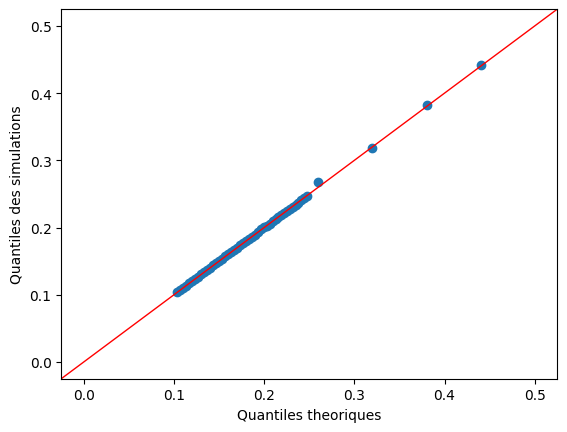

In [25]:
## QQ-plot
fig,ax=plt.subplots()
ax.axline((0, 0), (0.5, 0.5), linewidth=1, color='r')
ax.scatter(qth,qexp)
ax.set_xlabel("Quantiles theoriques")
ax.set_ylabel("Quantiles des simulations")
fig.show()

## III - Simulation du tapis de feuilles mortes

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

On s'intéresse dorénavant à la simulation de tapis de feuilles mortes. On prend en particulier les valeurs suivantes pour les variables $\mathcal{D}$,$\mathcal{D}_{ext}$ et $\theta$.

---

</h1> 

In [8]:
## Taille des fenêtres
D=[-1,1]
Dext=[-2,2]

## Paramètre du processus de Poisson
theta=1

**Question 4.a.** Implémenter une fonction permettant de simuler la taille d'une feuille étant donnée sa couleur $i$, et les vecteurs $a,b\in\R^3$ définis à Q.3.b.

In [9]:
def simTaille(i,a,b):
    ## COMPLETER ###

**Question 4.b.** Implémenter une fonction permettant de simuler la couleur d'une feuille étant donné le vecteur $p\in\R^3$ contenant les probabilités $p_i=\mathbb{P}(c(F)=i)$.

In [10]:
def simCouleur(p):
    ## COMPLETER ###

**Question 4.c.** Implémenter une fonction permettant de simuler la position d'une feuille étant donné le domaine $\mathcal{D}_{ext}$.

In [11]:
def simPosition(Dext):
    ## COMPLETER ###

**Question 4.d.** Implémenter une fonction permettant de simuler le temps d'arrivée et les caractéristiques des feuilles tombant dans l'intervalle $[t_{\min},0[$, étant donnée une valeur de $t_{\min}<0$. La fonction devra retourner un tableau dont les colonnes contiennent, dans l'ordre, le temps d'arrivée, la position,la taille et la couleur des feuilles. On veillera à ce que les temps d'arrivées soient ordonnés dans l'ordre croissant.

*Indication: On pourra repartir de l'implémentation de la fonction permettant de simuler les temps d'arrivées et utiliser les fonctions implémentées aux Q.4.a-c.*

In [12]:
def simFeuilles(t_min,theta,p,a,b,Dext):
    ## COMPLETER ###


<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

D'après le modèle des feuilles mortes, des feuilles sont censées tomber depuis le temps $t=-\infty$, ce qui supposerait d'appeler la fonction définie à la question précédente avec $t_{\min}=-\infty$. Ceci est bien sûr impossible en pratique. 

On s'intéresse maintenant à comment obtenir une simulation du modèle en temps (de calcul) fini.

---

</h1> 

**Question 5.** Générer des simulations pour $t_{\min}=-100$ et $t_{\min}=-500$. Le domaine $\mathcal{D}$ est-il entièrement recouvert? Quelle contradiction obtenons-nous avec les résultats obtenus en Q.2? Existe-t-il une valeur finie de $t_{\min}$ qui permettrait, presque-sûrement, de lever cette contradiction?

In [ ]:
# Test: Simulation de tapis de feuilles

## t_min = -100
Sim_m100=## COMPLETER ###
## Plot
plotSim(Sim_m100)

## t_min = -500
Sim_m500=## COMPLETER ###
## Plot
plotSim(Sim_m500)

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

Pour lever la contradiction observée à la question précédente, on aurait besoin de déterminer a priori la valeur de $t_{\min}$ à partir de laquelle le sol est entièrement recouvert de feuilles. Cette valeur est aléatoire, car elle dépend des caractéristiques des feuilles qui tombent dans l'intervalle $[t_{\min},0[$. Afin de pouvoir tout de même accéder à une telle valeur, on se propose de considérer le modèle suivant.

Cette fois, on commence à $t=U_0=0$ avec un sol vide, et on fait tomber des feuilles selon un processus de Poisson $(U_i)_{i\in\mathbb{N}^*}$ sur $]0,\infty[$. Les caractéristiques des feuilles $F_i$ tombées à chaque instant $U_i$ sont déterminées de la même facon que pour le modèle des feuilles mortes. Soit $M = \inf\lbrace i \in\mathbb{N}^* : \mathcal{D}\subset\cup_{1\le k\le i} F_i  \rbrace$, c'est-à-dire l'indice (aléatoire) $M$ à partir duquel le sol est recouvert de feuilles.

---

</h1> 

**Question 6.a.** Soit $E \sim \mathcal{E}(\theta)$ indépendante des $U_i$. Pour $i\in\lbrace 1,...,M\rbrace$, on pose 
$$ T_{-i} = U_{M+1-i} - (U_M+E)$$
Montrer que les feuilles $(F_i)_{1\le i\le M}$ correspondent aux $M$ dernières feuilles d'un modèle des feuilles mortes ayant pour temps d'arrivée $(T_{-i})_{1\le i\le M}$ (i.e. $F_M$ arrive au temps $T_{-1}$, $F_{M-1}$ arrive au temps $T_{-2}$,...).

*Indication: On pourra utiliser la caractérisation des temps d'arrivée d'un modèles des feuilles mortes donnée en Q.1.dbis.*

**Question 6.b.** En déduire une fonction permettant de simuler ces feuilles.

*Indication: Pour vérifier que les points du sol sont recouverts, on se contentera de vérifier que les points d'un maillage fin du sol, appelé Ddiscr dans le code ci-dessous, sont recouverts par une feuille*

In [ ]:
## Maillage du sol
Ddiscr=np.stack(np.meshgrid(np.arange(D[0],D[1]+0.01,0.01),np.arange(D[0],D[1]+0.01,0.01)),axis=-1).reshape(-1,2)
Ddiscr[1:10,:]

In [15]:
def simFeuillesStop(theta,p,a,b,Dext):
    
    ## COMPLETER ###

In [ ]:
## Simulation du tapis de feuilles
Sim=simFeuillesStop(theta,p,a,b,Dext)
## Plot
plotSim(Sim)

**Question 6.c.**  Quelle est la distribution de la taille de la dernière feuille tombée sur le sol? La comparer, avec un QQ-plot, à la taille de la dernière feuille sur un échantillon de 1000 tapis de feuilles simulés avec la fonction créée à la question précédente. Que peut-on en conclure sur la méthode de simulation proposée?

In [17]:
## Simulation des tapis et extraction de la taille de la dernière feuille

## COMPLETER ###

In [ ]:
## Quantiles théoriques 
qth=## COMPLETER ###

## Quantiles des simulations
qexp=## COMPLETER ###

In [ ]:
## QQ-Plot
fig,ax=plt.subplots()
ax.axline((0, 0), slope=1, linewidth=1, color='r')
ax.scatter(qth,qexp)
ax.set_xlabel("Quantiles theoriques")
ax.set_ylabel("Quantiles des simulations")
plt.show()

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

Face à cette nouvelle déconvenue, on adopte un point de vue différent sur le tapis de feuilles mortes. Jusqu'à maintenant, on observait les feuilles tomber et s'empiler (pendant un temps infini), sur le sol. Ainsi, à $t=T_0=0$, on observe, en vue de dessus notre tapis de feuilles mortes. 

Supposons désormais qu'il nous est possible d'observer le sol par en-dessous (par exemple, parce que le sol est en fait une verrière plane en dessous de laquelle on se trouve). Comme pour la question précédente,  on commence à $t=U_0=0$ avec un sol vide, et on fait tomber des feuilles selon un processus de Poisson $(U_i)_{i\in\mathbb{N}^*}$ sur $]0,\infty[$. Les caractéristiques des feuilles $F_i$ tombées à chaque instant $U_i$ sont déterminées de la même façon que pour le modèle des feuilles mortes et $M$ désigne une nouvelle fois l'indice (aléatoire) $M$ à partir duquel le sol est recouvert de feuilles.

Puisqu'on observe maintenant le sol par en-dessous, après l'instant $U_{M}$, le tapis ne change plus car le sol est recouvert de feuilles et donc les nouvelles feuilles qui tombent sont cachées par celle qui sont déjà présentes. Ainsi, contrairement à la construction précédente, le tapis est fixé à partir d'un certain temps. 

---

</h1> 


**Question 7.a.**  Pour $i\in\lbrace 1,...,M\rbrace$, on pose 
$$ T_{-i} = -U_{i}$$
Montrer qu'en associant la feuille $F_i$ au temps $T_{-i}$, les feuilles $(F_i)_{1\le i\le M}$ correspondent aux $M$ dernières feuilles d'un modèle des feuilles mortes.

**Question 7.b.** En déduire une fonction permettant de simuler ces feuilles. 

In [19]:
def simFeuillesDessous(theta,p,a,b,Dext):
    
  ## COMPLETER ###


In [ ]:
## Simulation du tapis de feuilles
Sim=simFeuillesDessous(theta,p,a,b,Dext)
## Plot
plotSim(Sim)

**Question 7.c.**  Comparer la distribution, avec un QQ-plot, de la taille de la dernière feuille tombée sur le sol à la taille de la dernière feuille sur un échantillon de 1000 tapis de feuilles simulés avec la fonction créée à la question précédente. Que peut-on en conclure sur la méthode de simulation proposée?

In [21]:
## Simulation des tapis et extraction de la taille de la dernière feuille

## COMPLETER ###

In [ ]:
## Quantiles théoriques 
qth=## COMPLETER ###

## Quantiles des simulations
qexp=## COMPLETER ###



In [ ]:
## QQ-Plot
fig,ax=plt.subplots()
ax.axline((0, 0), slope=1, linewidth=1, color='r')
ax.scatter(qth,qexp)
ax.set_xlabel("Quantiles theoriques")
ax.set_ylabel("Quantiles des simulations")
plt.show()

**Question 7.cbis.(Bonus)** Montrer qu'avec ce modèle, on retrouve que la probabilité que la couleur du tapis au point $x_0\in\mathcal{D}$  soit $i$ est également donnée par
$$P(C(x_0)=i)=\frac{p_i r_i^2}{\sum_{j=1}^{N_c} p_jr_j^2}$$

**Question 7.d.** Implémenter une fonction permettant, étant donné un ensemble de points $x_0\in\mathcal{D}$, de recalculer numériquement les probabilités $\mathbb{P}(C(x_0)=i)$ pour $i\in\lbrace 1, \dots, N_c\rbrace$ à partir de simulations de tapis (réalisées avec la fonction simFeuillesDessous). Appliquer cette fonction à l'ensemble de points $X_0$ défini dans le code et interpréter les résultats.

In [ ]:
##  Fonction de calcul des probabilités 
### X0 : Tableau contenant les coordonnées (sur chaque ligne) des points sur lequels on souhaite calculer les probabilités
### nsim : Nombre de simulations
def calcProb(X0,nsim):
    
    ## COMPLETER ###

In [ ]:
## Points sur lesquels évaluer les probabilités
X0=np.stack(np.meshgrid(np.arange(D[0],D[1]+0.2,0.2),np.arange(D[0],D[1]+0.2,0.2)),axis=-1).reshape(-1,2)

## Calcul et représentation
pvec=calcProb(X0,1000)
fig, ax = plt.subplots(3,1,figsize=(5,15))
Ngd=int(X0.shape[0]**0.5)
for i in range(Nc):
    im=ax[i].pcolormesh(X0[:,0].reshape((Ngd,Ngd)),X0[:,1].reshape((Ngd,Ngd)),pvec[:,i].reshape((Ngd,Ngd)))
    ax[i].set_title("Carte de probabilité pour la couleur i="+str(i))
    fig.colorbar(im)
plt.show()     

**Question 7.dbis.(Bonus)** Proposer un code permettant de simuler un tapis de feuille étant donnée qu'on fixe la couleur $i_0$ de la feuille au point $(0,0)$. Calculer numériquement les probabilités afin de valider les résultats de simulation.

In [24]:
## Simulation conditionnelle
def simFeuillesDessousCond(i0,theta,p,a,b,Dext):   
    ## COMPLETER ###    
